In [25]:
import numpy as np
import cvxpy as cp
from scipy.linalg import expm, sqrtm
import pickle
import matplotlib.pyplot as plt
import cmath
import dynamiqs as dq
from qutip import *
import math
import qutip as qt
import jax.numpy as jnp

In [2]:
def fidelity(rho, rho_ref):
    # Compute the square root of the reference density matrix.
    sqrt_rho_ref = sqrtm(rho_ref)

    #Compute the intermediate product sqrt(rho_ref) * rho * sqrt(rho_ref)
    intermediate = sqrt_rho_ref @ rho @ sqrt_rho_ref
    
    #Compute the square root of the intermediate product.
    sqrt_intermediate = sqrtm(intermediate)

    #Calculate the trace and ensure the result is real (to avoid small imaginary parts).
    fidelity_value = np.trace(sqrt_intermediate)
    fidelity_value = np.real(fidelity_value)

    #Return fidelity squared.
    return fidelity_value**2

In [3]:
def operator_for_alpha(alpha, n):
    a = np.zeros((n, n), dtype=complex)
    for j in range(1, n):
        a[j - 1, j] = np.sqrt(j)
    ad = a.conjugate().T
    D_alpha = expm(alpha * ad - np.conjugate(alpha) * a)
    P = np.diag([(-1)**j for j in range(n)])  # Fixed exponentiation
    DPD = D_alpha @ P @ D_alpha.conjugate().T
    I = np.eye(n, dtype=complex)
    E_alpha = 0.5 * (I + DPD)
    return E_alpha

In [4]:
def compute_model_wigner(rho, E_alpha):
    p_alpha = cp.real(cp.trace(rho @ E_alpha))
    W_model = (2 / np.pi) * (2 * p_alpha - 1)  # Fixed syntax
    return W_model

## Real Data

In [5]:
file_path = "data/wigner_fock_zero.pickle"  # Update this if needed
with open(file_path, "rb") as f:
    data = pickle.load(f)

x = data[0]  # 1D array for Re(α)
y = data[1]  # 1D array for Im(α)
W = data[2]  # 2D array for Wigner function values
print(x,y,W)
print(len(x),len(y),len(W))

[-0.4        -0.39191919 -0.38383838 -0.37575758 -0.36767677 -0.35959596
 -0.35151515 -0.34343434 -0.33535354 -0.32727273 -0.31919192 -0.31111111
 -0.3030303  -0.29494949 -0.28686869 -0.27878788 -0.27070707 -0.26262626
 -0.25454545 -0.24646465 -0.23838384 -0.23030303 -0.22222222 -0.21414141
 -0.20606061 -0.1979798  -0.18989899 -0.18181818 -0.17373737 -0.16565657
 -0.15757576 -0.14949495 -0.14141414 -0.13333333 -0.12525253 -0.11717172
 -0.10909091 -0.1010101  -0.09292929 -0.08484848 -0.07676768 -0.06868687
 -0.06060606 -0.05252525 -0.04444444 -0.03636364 -0.02828283 -0.02020202
 -0.01212121 -0.0040404   0.0040404   0.01212121  0.02020202  0.02828283
  0.03636364  0.04444444  0.05252525  0.06060606  0.06868687  0.07676768
  0.08484848  0.09292929  0.1010101   0.10909091  0.11717172  0.12525253
  0.13333333  0.14141414  0.14949495  0.15757576  0.16565657  0.17373737
  0.18181818  0.18989899  0.1979798   0.20606061  0.21414141  0.22222222
  0.23030303  0.23838384  0.24646465  0.25454545  0

## Simulated Data

### fock zero

In [20]:
N = 10      # Hilbert space dimension (must be > n)
n = 1       # Fock state to visualize
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

# Step 2: Create state
fock_state = fock(N, n)

# Step 3: Compute the Wigner function
W = wigner(fock_state, x, y)
print(x,y,W)
print(len(x),len(y),len(W))

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

### coherent

In [100]:
N = 10      # Hilbert space dimension (must be > n)
n = 1       # Fock state to visualize
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

# Step 2: Create state
coherent_state = coherent(N,alpha=1.0)

# Step 3: Compute the Wigner function
W = wigner(coherent_state, x, y)
print(x,y,W)
print(len(x),len(y),len(W))

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

### 2Cat State

In [33]:
alpha=2.0
alpha2=2.0 *jnp.exp(1j*2*jnp.pi/3)
alpha3=2.0 *jnp.exp(1j*4*jnp.pi/3)
N==10

psi=1/jnp.sqrt(3)* (dq.coherent(N,alpha) + dq.coherent(N,alpha2) +dq.coherent(N,alpha3))
wigner_state=dq.wigner(psi)
W=wigner_state[2]
print(wigner_state[0], wigner_state[1],W)
print(len(wigner_state[0]),len(wigner_state[1]),len(W))

[-6.         -5.94       -5.88       -5.82       -5.76       -5.7000003
 -5.6400003  -5.58       -5.52       -5.46       -5.4        -5.34
 -5.28       -5.2200003  -5.16       -5.1        -5.04       -4.98
 -4.92       -4.86       -4.7999997  -4.74       -4.68       -4.62
 -4.56       -4.5        -4.44       -4.38       -4.32       -4.26
 -4.2000003  -4.1400003  -4.0800004  -4.02       -3.96       -3.9
 -3.8400002  -3.78       -3.72       -3.66       -3.6000001  -3.54
 -3.48       -3.42       -3.3600001  -3.2999997  -3.2399998  -3.1799998
 -3.12       -3.06       -3.         -2.94       -2.88       -2.8200002
 -2.7600002  -2.7000003  -2.6400003  -2.5800004  -2.52       -2.46
 -2.4        -2.3400002  -2.28       -2.22       -2.16       -2.1000001
 -2.0400002  -1.9800001  -1.9200002  -1.8600003  -1.8000003  -1.74
 -1.6800001  -1.6199999  -1.56       -1.5        -1.44       -1.3800001
 -1.3200002  -1.2600002  -1.2000003  -1.1400003  -1.0800002  -1.0200002
 -0.9599999  -0.9        -0.84000

In [21]:
alpha = np.zeros(len(x)*len(y),dtype=complex)
for i in range(len(y)):
    for k in range(len(x)):
        alpha[i*len(y)+k]=x[k]+y[i]*1j
    
w = np.zeros(len(x)*len(y))
for i in range(len(y)):
    for k in range(len(x)):
        w[i*len(y)+k]=W[i][k]

print(alpha)
print(w)
print(len(alpha))
print(len(w))

[-3.        -3.j -2.93939394-3.j -2.87878788-3.j ...  2.87878788+3.j
  2.93939394+3.j  3.        +3.j]
[1.69674859e-07 2.38188757e-07 3.31919761e-07 ... 3.31919761e-07
 2.38188757e-07 1.69674859e-07]
10000
10000


In [6]:
N = 10
alpha_list = alpha
# Simulated Wigner values for a vacuum state
wigner_measured = w

# Define optimization variable
rho = cp.Variable((N, N), complex=True)

# Constraints: rho is Hermitian, positive semi-definite, and trace 1
constraints = [rho >> 0, cp.trace(rho) == 1, rho == rho.H]

# Construct loss function
loss_terms = []
for alpha, W_meas in zip(alpha_list, wigner_measured):
    E_alpha = operator_for_alpha(alpha, n)
    W_model = compute_model_wigner(rho, E_alpha)
    loss_terms.append(cp.square(W_model - W_meas))
loss = cp.sum(loss_terms)

# Solve the optimization problem
prob = cp.Problem(cp.Minimize(loss), constraints)
result = prob.solve(solver=cp.MOSEK, verbose=True)  # You can replace SCS with MOSEK if installed

print("Optimal loss:", loss.value)
print("Reconstructed density matrix rho:")
print(rho.value)

NameError: name 'alpha' is not defined

In [22]:
# Truncated Hilbert space dimension.
N = 10

# Number of measurements (sample points)
K = 100

# ------------------------------
# BUILDING THE QUANTUM OPERATORS
# ------------------------------
# Construct the annihilation operator a (in Fock space basis)
a = np.zeros((N, N), dtype=complex)
for n in range(N - 1):
    a[n, n + 1] = np.sqrt(n + 1)
a_dag = a.conj().T

# Parity operator: P = exp(i*pi * a^\dagger a) = diag[(-1)^n]
P = np.diag([(-1) ** n for n in range(N)])

def displacement(alpha):
    """
    Returns the displacement operator D(alpha) = exp( alpha*a_dag - alpha*.a )
    for a given alpha.
    """
    # Note: if alpha is real, then np.conjugate(alpha)==alpha.
    return expm(alpha * a_dag - np.conjugate(alpha) * a)

# Precompute the measurement observables E_alpha = 1/2*(I + D(alpha) P D(alpha)^\dagger)
E_list = []
I_N = np.eye(N)
for alp in alpha:
    D_alpha = displacement(alp)
    # Construct E_alpha. (Ensure numerical Hermiticity by symmetrizing the matrix.)
    E_alpha = 0.5 * (I_N + D_alpha @ P @ D_alpha.conj().T)
    E_alpha = 0.5 * (E_alpha + E_alpha.conj().T)  # force Hermitian symmetry
    E_list.append(E_alpha)

# ------------------------------
# SET UP THE OPTIMIZATION PROBLEM
# ------------------------------
# We use a complex Hermitian variable for the density matrix.
rho = cp.Variable((N, N), complex=True)

# The constraints are: rho == rho†, rho is positive semidefinite, and trace(rho) = 1.
constraints = [
    rho == rho.H,      # Hermitian constraint
    rho >> 0,          # Positive semidefiniteness (density matrix is PSD)
    cp.trace(rho) == 1 # Unit trace
]

# Build the least-squares objective:
# For each measurement, the predicted probability is p_k = Tr(E_k * rho).
# We use cp.real(...) to guard against any negligible imaginary parts.
residuals = []
for k in range(K):
    p_k = cp.real(cp.trace(E_list[k] @ rho))
    residuals.append(p_k - w[k])
# Sum squares of residuals.
objective = cp.sum_squares(cp.hstack(residuals))

# Define and solve the optimization problem.
prob = cp.Problem(cp.Minimize(objective), constraints)
result = prob.solve(solver=cp.MOSEK)

# ------------------------------
# OUTPUT THE RESULTS
# ------------------------------
print("Optimal objective value (sum of squared residuals):", result)
print("Reconstructed density matrix rho:")
print(rho.value)

Optimal objective value (sum of squared residuals): 1.4006052649011984
Reconstructed density matrix rho:
[[ 8.67935280e-01+0.00000000e+00j  5.13988154e-15+1.15854900e-01j
  -9.32062496e-02-1.25600406e-14j  6.72239210e-15+9.69689637e-02j
  -2.67908659e-01+5.94349615e-16j -2.39229639e-15-8.87280426e-02j
   2.67290846e-02-6.26771585e-15j -7.72452382e-15-4.25953751e-02j
   2.01106162e-02+3.34555575e-15j -2.94438939e-15+2.30201028e-02j]
 [ 5.13988154e-15-1.15854900e-01j  1.54646990e-02+0.00000000e+00j
  -2.22851383e-15+1.24414815e-02j  1.29437411e-02-3.23023833e-16j
  -1.50697134e-15+3.57613426e-02j -1.18437155e-02-2.06711243e-16j
  -6.78533030e-16-3.56788747e-03j -5.68577293e-03+7.77991837e-16j
   5.65376019e-16-2.68443222e-03j  3.07280021e-03+5.29118976e-16j]
 [-9.32062496e-02+1.25600406e-14j -2.22851383e-15-1.24414815e-02j
   1.00092774e-02+0.00000000e+00j -2.12506409e-15-1.04133495e-02j
   2.87703034e-02-3.94083081e-15j  1.54044880e-15+9.52836955e-03j
  -2.87039575e-03+1.06040274e-15j  

In [9]:
# Parameters: coherent state amplitude and Hilbert space truncation dimension

# Precompute the normalization factor
norm = math.exp(-abs(1)**2)

# Construct the coherent state vector in the Fock basis up to N-1:
# |alpha> = e^(-|alpha|^2/2) * [alpha^n / sqrt(n!)]_{n=0}^{N-1}
coherent_state = np.array([1**n / np.sqrt(math.factorial(n)) for n in range(N)], dtype=complex)
coherent_state = np.exp(-abs(1)**2/2) * coherent_state

# Construct the density matrix: rho = |alpha><alpha|
rho_coherent = np.outer(coherent_state, coherent_state.conj())
print(rho_coherent)
rho_coh = np.zeros((N, N), dtype=complex)
for i in range(N):
    for k in range(N):
        rho_coh[i, k]=rho_coherent[i][k]

print(rho_coh)


[[3.67879441e-01+0.j 3.67879441e-01+0.j 2.60130048e-01+0.j
  1.50186153e-01+0.j 7.50930765e-02+0.j 3.35826447e-02+0.j
  1.37100573e-02+0.j 5.18191458e-03+0.j 1.83208347e-03+0.j
  6.10694490e-04+0.j]
 [3.67879441e-01+0.j 3.67879441e-01+0.j 2.60130048e-01+0.j
  1.50186153e-01+0.j 7.50930765e-02+0.j 3.35826447e-02+0.j
  1.37100573e-02+0.j 5.18191458e-03+0.j 1.83208347e-03+0.j
  6.10694490e-04+0.j]
 [2.60130048e-01+0.j 2.60130048e-01+0.j 1.83939721e-01+0.j
  1.06197647e-01+0.j 5.30988236e-02+0.j 2.37465158e-02+0.j
  9.69447449e-03+0.j 3.66416694e-03+0.j 1.29547865e-03+0.j
  4.31826215e-04+0.j]
 [1.50186153e-01+0.j 1.50186153e-01+0.j 1.06197647e-01+0.j
  6.13132402e-02+0.j 3.06566201e-02+0.j 1.37100573e-02+0.j
  5.59710745e-03+0.j 2.11550777e-03+0.j 7.47944945e-04+0.j
  2.49314982e-04+0.j]
 [7.50930765e-02+0.j 7.50930765e-02+0.j 5.30988236e-02+0.j
  3.06566201e-02+0.j 1.53283100e-02+0.j 6.85502865e-03+0.j
  2.79855373e-03+0.j 1.05775388e-03+0.j 3.73972472e-04+0.j
  1.24657491e-04+0.j]
 [3.3

In [10]:
#Example reference state: the vacuum state (|0><0|) embedded in a n-dimensional space.
rho_fock_0 = np.zeros((N, N), dtype=complex)
rho_fock_0[0, 0] = 1.0  # Only the first element is nonzero.
print(rho_fock_0)

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


In [11]:
# Normalize rho so that trace(rho) = 1.
rho_val = rho.value / np.trace(rho.value)
print(rho_val)
#Compute the fidelity.
F = fidelity(rho_val, rho_fock_0)
print("Fidelity between rho and rho_ref:", F)

[[ 2.63973005e-02+0.00000000e+00j  1.37436051e-03-4.63699774e-02j
   7.53328381e-02+1.60906132e-03j  4.04849648e-04-1.18223576e-02j
   6.99000799e-02+1.42468499e-03j -6.67970440e-04+1.43699409e-02j
   4.34915935e-02+1.29725544e-03j -1.20666619e-03+7.14244618e-02j
   7.46961612e-02+1.34947293e-03j -7.04180559e-04+7.61077367e-03j]
 [ 1.37436051e-03+4.63699774e-02j  8.15258968e-02+0.00000000e+00j
   1.09565505e-03+1.32414802e-01j  2.07884458e-02+9.56419206e-05j
   1.13668041e-03+1.22861922e-01j -2.52772757e-02-4.25206152e-04j
  -1.44173500e-05+7.64656612e-02j -1.25528326e-01+1.59902190e-03j
   1.51850428e-03+1.31282888e-01j -1.34058858e-02-8.40725777e-04j]
 [ 7.53328381e-02-1.60906132e-03j  1.09565505e-03-1.32414802e-01j
   2.15083563e-01+0.00000000e+00j  4.34725491e-04-3.37634217e-02j
   1.99568273e-01-1.95017974e-04j -1.03033234e-03+4.10497741e-02j
   1.24195749e-01+1.05106560e-03j  9.10121025e-04+2.03905282e-01j
   2.13250789e-01-7.02006064e-04j -1.54567777e-03+2.17626119e-02j]
 [ 4.04

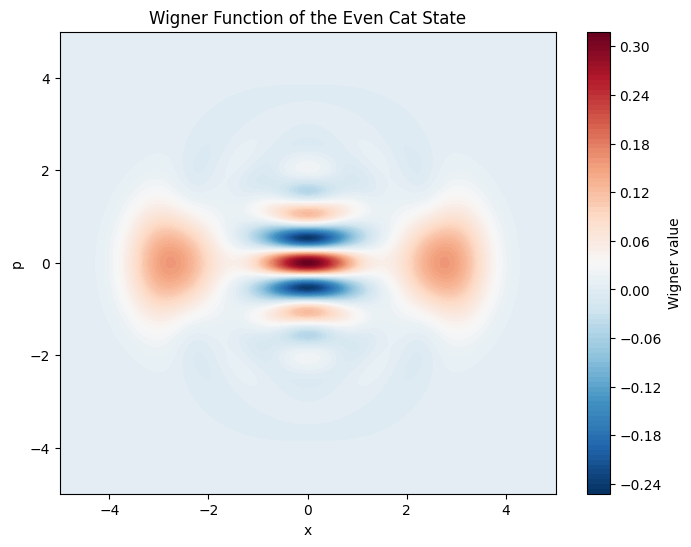

Density matrix of the even cat state:
Quantum object: dims=[[10], [10]], shape=(10, 10), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.03794646 0.         0.10732012 0.         0.12377176 0.
  0.08911174 0.         0.04157607 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.10732012 0.         0.30352257 0.         0.35005108 0.
  0.25202566 0.         0.11758537 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.12377176 0.         0.35005108 0.         0.40371218 0.
  0.29065995 0.         0.13561063 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.08911174 0.         0.25202566 0.         0.29065995 0.
  0.20926593 0.         0.09763535 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.0

In [ ]:
N = 10             # Hilbert space dimension (choose a value that accurately captures your state)
alpha = 2.0        # Coherent amplitude; you can adjust this

# ------------------------------
# Constructing the Even Cat State
# ------------------------------
# Create coherent states |alpha> and |-alpha>
coherent_state_plus  = qt.coherent(N, alpha)
coherent_state_minus = qt.coherent(N, -alpha)

# Construct the even cat state vector by adding the two coherent states.
# The .unit() method normalizes the state automatically.
psi_cat = (coherent_state_plus + coherent_state_minus).unit()

# Compute the density matrix for the cat state.
rho_cat = psi_cat * psi_cat.dag()

# ------------------------------
# (Optional) Compute and Plot the Wigner Function
# ------------------------------
# Define a phase-space grid.
xvec = np.linspace(-5, 5, 200)

# Compute the Wigner function of the cat state.
wigner_data = qt.wigner(rho_cat, xvec, xvec)

print("Density matrix of the even cat state:")
print(rho_cat)


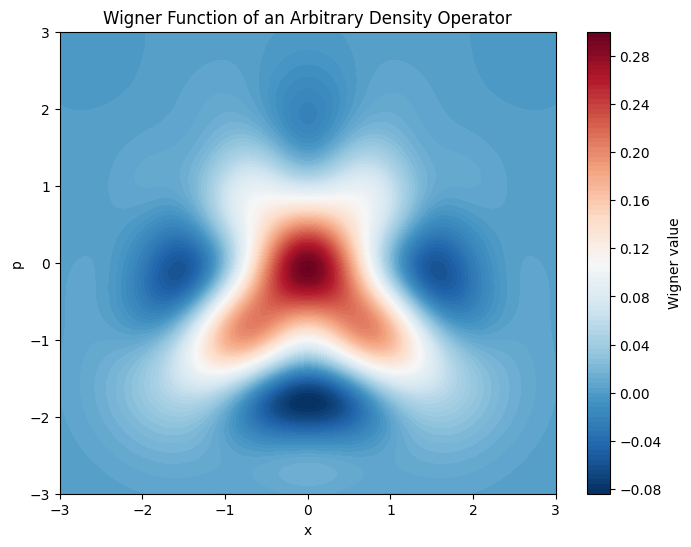

In [23]:
N = 10
rho_qobj = qt.Qobj(rho.value)

# Define the phase-space grid for x (position) and p (momentum).
xvec = np.linspace(-3, 3, 200)

# Compute the Wigner function for the arbitrary density operator.
wigner_data = qt.wigner(rho_qobj, xvec, xvec)

# Plotting the Wigner function
plt.figure(figsize=(8, 6))
contour = plt.contourf(xvec, xvec, wigner_data, levels=100, cmap='RdBu_r')
plt.xlabel('x')
plt.ylabel('p')
plt.title('Wigner Function of an Arbitrary Density Operator')
plt.colorbar(contour, label='Wigner value')
plt.show()